In [1]:
# ! pip install hyperopt

In [1]:
from ricatti_observer_class import riccati_observer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as pytime
from hyperopt import hp, fmin, tpe, space_eval

use_adaptive            = True
quaternion              = True
stepsize                = 0.01
tol                     = 1e-2 * 5
noise                   = False
which_eq                = 0
which_omega             = "full" # "z" or "full"
with_image_hz_sim       = False
image_hz                = 30
randomize_image_input   = False
p_hat                   = np.array([[0, 0, 0]], dtype=np.float64).T
Lambda_bar_0            = np.array([1, 0, 0, 0], dtype=np.float64).T  # quaternion: w, x, y, z
z_appear                = np.array([[[-2.5, 1, 5]], 
                                    [[0, 1,   7.5]], 
                                    [[2.5,1,  5]]])
p_ricatti               = np.array([1, 100])


riccati_obj = riccati_observer(
    use_adaptive            = use_adaptive,
    quaternion              = quaternion,
    time                    = (0, 50),
    stepsize                = stepsize,
    tol                     = tol,
    noise                   = noise,
    which_eq                = which_eq,
    which_omega             = which_omega, # "z" or "full"
    with_image_hz_sim       = with_image_hz_sim,
    image_hz                = image_hz, 
    randomize_image_input   = randomize_image_input,
    p_hat                   = p_hat,
    Lambda_bar_0            = Lambda_bar_0,  # quaternion: w, x, y, z
    z_appear                = z_appear,
    k                       = 1,
    q                       = [10], 
    v                       = np.array([0.1, 1]),
    p_ricatti               = p_ricatti
    )


        Parameters
        use_adaptive           | True
        quaternion             | True
        time                   | (0, 50)
        stepsize               | 0.01
        tol                    | 0.05
        noise                  | False
        which_eq               | 0
        which_omega            | full
        with_image_hz_sim      | False
        image_hz               | 30
        randomize_image_input  | False
        number of landmark     | 3
        Initial estimate pose  | [0. 0. 0.]
        Initial estimate ori   | [1 0 0 0]
        k                      | 1
        z_appear               | [-2.5  1.   5.   0.   1.   7.5  2.5  1.   5. ]
        Q                      |
                                 10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  0.0  0.0  10.0  0.0  0

In [2]:
riccati_obj.full_simulation()

Simulation time: 49.9950807094574       Run time: 49.9950959682464647



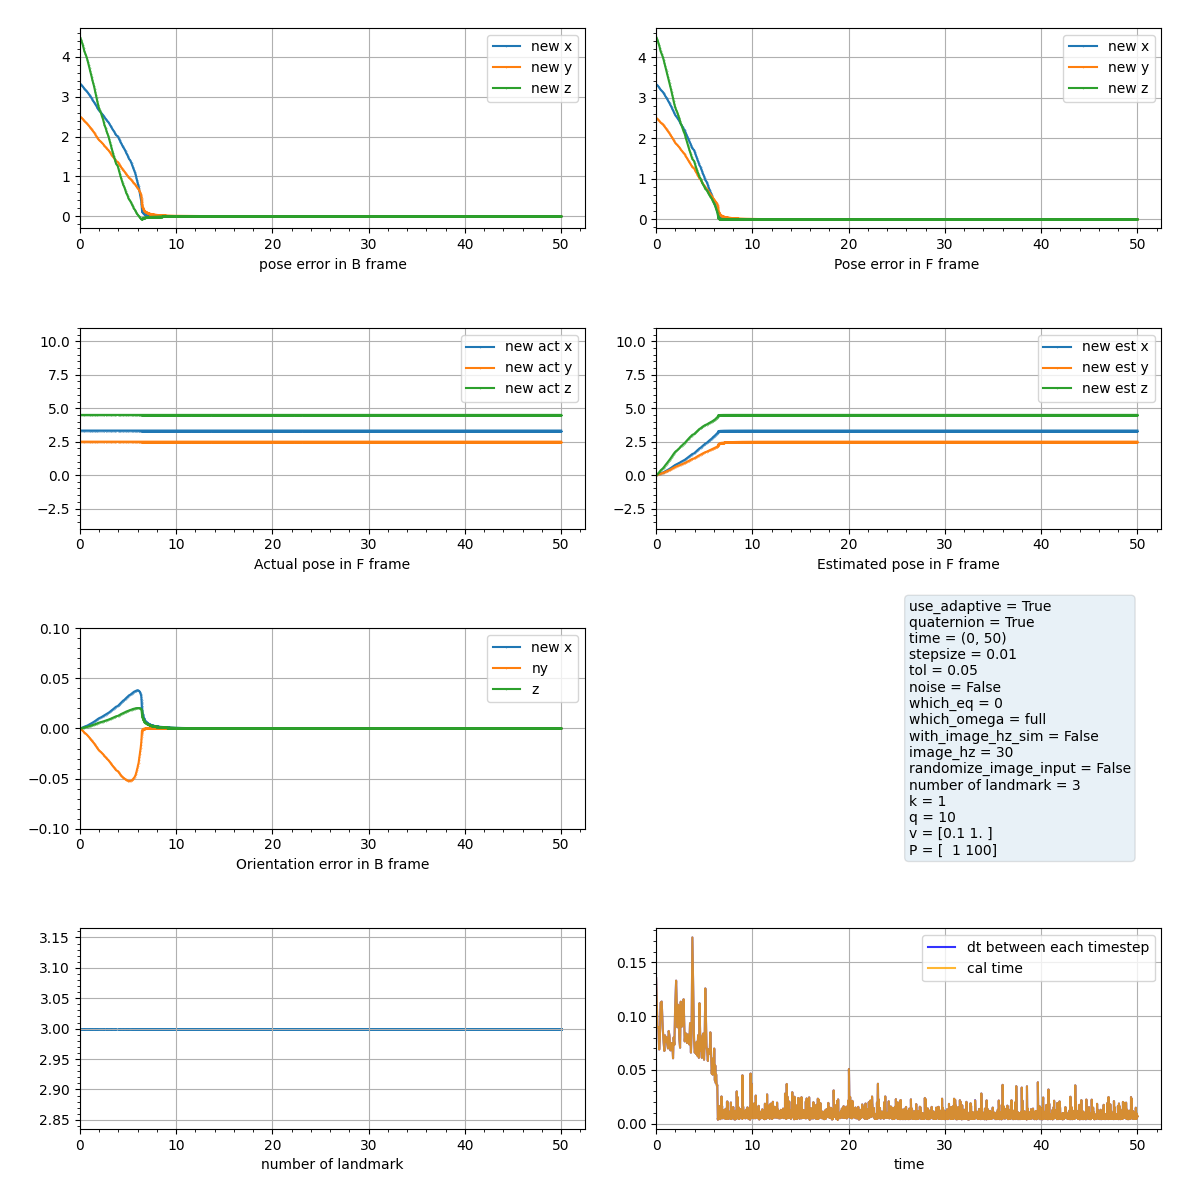

In [3]:
%matplotlib widget
fig, ax, lambda_, p_bar = riccati_obj.visual_plot(figsize=(12,12), bound_y=False)  

In [29]:
np.shape(riccati_obj.solt)

(3781,)

In [33]:
a = np.hstack((lambda_, p_bar, (np.array(riccati_obj.solt).reshape(-1,1)))).flatten()
print(np.shape(a))
b = np.reshape(a, (-1, 8))
print("b", np.shape(b))

(30248,)
b (3781, 8)


In [34]:
import pandas as pd
df = pd.DataFrame(a)
df.to_csv('/home/annika/ITRL/kth_thesis/simulated_result/angular.txt', sep='\t', index=False, header=False)